# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Homework #1
**Harvard University**<br>
**Spring 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Thursday, Febrary 1st, 2018 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [4]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Bayes Theorem

**Coding not required**

### Part A:
Your child has been randomly selected for Type I diabetes screening, using a highly accurate new test that boasts of a false positive rate of 1% and a false negative rate of 0%. The prevalence of of Type I diabetes in children is approximately 0.228%. 

1.Should your child test positive, what is the probability that he/she has Type I diabetes?

2.Should you be concerned enough to ask for further testing or treatment for your child? Suppose an independent test with the same false positive/false negative rate is available.

Later, you read online that Type I diabetes is 6 times more prevalent in prematurely born children. 

3.If this statistic is true, what is the probability that your child, who is prematurely born, has Type I diabetes?

4.Subjectively, given the new information, should you be concerned enough to ask for treatment for your child?

**Justify your decisions using your calculations.**


****

#### 1)

Lets label some events:

A: child has type I diabetes

B: child tests positive

Then the probability we care about is the one below which can be expanded using Bayes.

$$ P(A|B) = \frac{P(B|A)*P(A)}{P(B)} = \frac{P(B|A)*P(A)}{P(B|A)P(A) + P(B|A^c)P(A^c)} $$

We have been given:

False positive rate: $$ P(B|A^c) = 0.01 $$
and
false negative rate: $$ P(B^c|A) = 0 $$

Thus:

$$ P(B|A) = 1 - P(B^c|A) = 1 $$

Thus:
    
$$ P(A|B) = \frac{0.00228}{0.00228+0.01*(1-0.00228)} = 18.6\%$$

#### 2)


Lets do some more subtle defining of events:

A: child has type I diabetes

B1: child tests positive on test 1

B2: child tests positive on test 2

Now we want to condition on test B1 being positive and test B2 being either positive or negative. Lets start with test B2 being positive then:


$$ P(A|B_1,B_2) = \frac{P(B_1,B_2|A) P(A)}{P(B_1,B_2)} = \frac{P(B_1|A)P(B_2|A)P(A)}{P(B_1,B_2|A)P(A) + P(B_1,B_2|A^c)P(A^c)} = 95.8\%$$

If we get test B2 as negative then:

$$ P(A|B_1,B_2^c) = \frac{P(B_1,B_2^c|A) P(A)}{P(B_1,B_2^c)} = \frac{P(B_1|A)P(B_2^c|A)P(A)}{P(B_1,B_2^c|A)P(A) + P(B_1,B_2^c|A^c)P(A^c)} = 0 \% $$


Now this is more telling of whether the child has diabetes. It makes sense to go for the second test (hopefully its affordable).



#### 3)

If it is 6 times more likely then we need to multiply 0.00228 by 6 to account for premature births.

$$ P(A|B) = \frac{0.00228*6}{0.00228*6 + 0.01*(1-6*0.00228)} = 58.1\% $$

#### 4)

There is a high chance that the child has type I diabetes if the prevalence is 6 times higher. I would be inclined to ask for treatment.

### Part B:

During shopping week, you're trying to decide between two classes based on the criteria that the class must have a lenient grading system. 

Both classes have hard TFs who give assignments lower grades than the work merits. You know from rumors that in one class has 35% of the TF staff are harsh graders and in the other class 15% are harsh graders, but you don't know which class is which.

So, you decide to conduct an experiment: submit an assignment to be graded. Fortunately, both classes offer an optional Homework 0 that is graded as extra credit. Unfortunately, you only have time to complete the problem set for just one of these classes. 

Suppose you randomly pick the Homework 0 from Class A to complete and suppose that you received a grade that you believe is lower than the quality of your work warrents. 

1. Based on this evidence, what is the probability that Class A has the harsher grading system? Which class should you drop based on the results of your experiment (or do you not have sufficient evidence to decide)?


**Justify your decisions using your calculations.**

***

##### 1)

Define two events:

H - harsher grader in class A

L - receive lower than expected grade in class A

We also know that:
P(L|H) = 0.35
P(L|H^c) = 0.15

and that P(H) = 0.5 since we randomly picked 1 of the 2 classes.

therefore:

$$ P(H|L) = P(L|H)P(H)/P(L) = \frac{P(L|H)P(H)}{P(L|H)P(H) + P(L|H^c)P(H^c)} $$


$$ P(H|L) = \frac{0.35*0.5}{0.35*0.5 + 0.15*0.5} = 70\% $$



Based on this information, the student should drop class A

## Problem 2: Maximum Likelihood Estimates

**Coding required for Part B only**

Suppose you observe the following data set $\mathbf{x}^{(0)} = (0.5, 2.5), \mathbf{x}^{(1)} = (3.2, 1.3), \mathbf{x}^{(2)} = (2.72, 5.84), \mathbf{x}^{(3)}= (10.047, 0.354)$. By convention, for any vector $\mathbf{x}$, we will denote the first component of $\mathbf{x}$ by $x_{1}$ and the second component by $x_{2}$. Suppose that the data is drawn from the same two-dimensional probability distribution with pdf $f_X$, that is, $\mathbf{x}^{(i)} \overset{iid}{\sim} f_X$, where
$$
f_X(\mathbf{x}) =  4\lambda_1^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda_0 (x^2_{1} + x^2_{2}) \right\}.
$$
You should assume that $\lambda_1, \lambda_0 > 0$ and that $f_X$ is supported on the nonnegative quandrant of $\mathbb{R}^2$ (i.e. $f_X$ is zero when either component is negative). 

### Part A:

What are the values for $\lambda_0$ and $\lambda_1$ that maximizes the likelihood of the observed data? 

**Support your answer with full and rigorous analytic derivations.**


***

Step 1: Need to integrate and normalize:
    
Lets split the integration then:

$$ \int_0^{\infty} 2\lambda_1 x_1 e^{-\lambda_0 x_1^2} dx_1 * \int_0^{\infty} 2\lambda_1 x_2 e^{-\lambda_0 x_2^2} dx_2 = 1$$

These two integrals are identical so we can focus on doing one and then multiplying:

$$  \int_0^{\infty} 2\lambda_1 x_1 e^{-\lambda_0 x_1^2} dx_1 = - \frac{\lambda_1}{\lambda_0} e^{-\lambda_0 x_1^2} |_0^{\infty} = \frac{\lambda_1}{\lambda_0} $$ 


Therefore we get:

$$ \frac{\lambda_1}{\lambda_0} * \frac{\lambda_1}{\lambda_0} = 1 $$

$$ \lambda_1^2 = \lambda_0^2 $$

we can now replace this in the pdf and continue our MLE optimization!

$$ L(\lambda_1,\lambda_0) = \prod_{i=1}^{4} P(x_i|\lambda_1,\lambda_0) $$


$$ l(\lambda_1,\lambda_0) = \sum_{i=1}^{4} ln(P(x_i|\lambda_1,\lambda_0)) $$

$$ l = \sum_{i=1}^4 ln(4\lambda_0^2 x_{1i} x_{2i}) -\lambda_0(x_{1i}^2 + x_{2i}^2) $$

$$ dl/d\lambda_0 = 8/\lambda_0 - \sum_{i=1}^{4} (x_{1i}^2 + x_{2i}^2) = 0$$

$$ \sum (x_{1i}^2 + x_{2i}^2) = 0.5^2 + 2.5^2 + 3.2^2 + 1.3^2 + 2.72^2 + 5.84^2 + 10.047^2 + 0.354^2 = 161.001525 $$

Thus:

$$ \lambda_0 = 8/161.001525 = 0.049688 $$

Since $ \lambda_0^2 = \lambda_1^2 $

$$ \lambda_1 = 0.049688$$

### Part B:

Visualize the data along with the distribution you determined in part A (in two dimensions or three).


***

#### 3-D Visualization

In [21]:
def f(x1,x2):
    return 4*0.049688**2*x1*x2*np.exp(-0.049688*(x1**2 + x2**2))

In [24]:
x1 = np.linspace(0,10,100)
x2 = np.linspace(0,10,100)

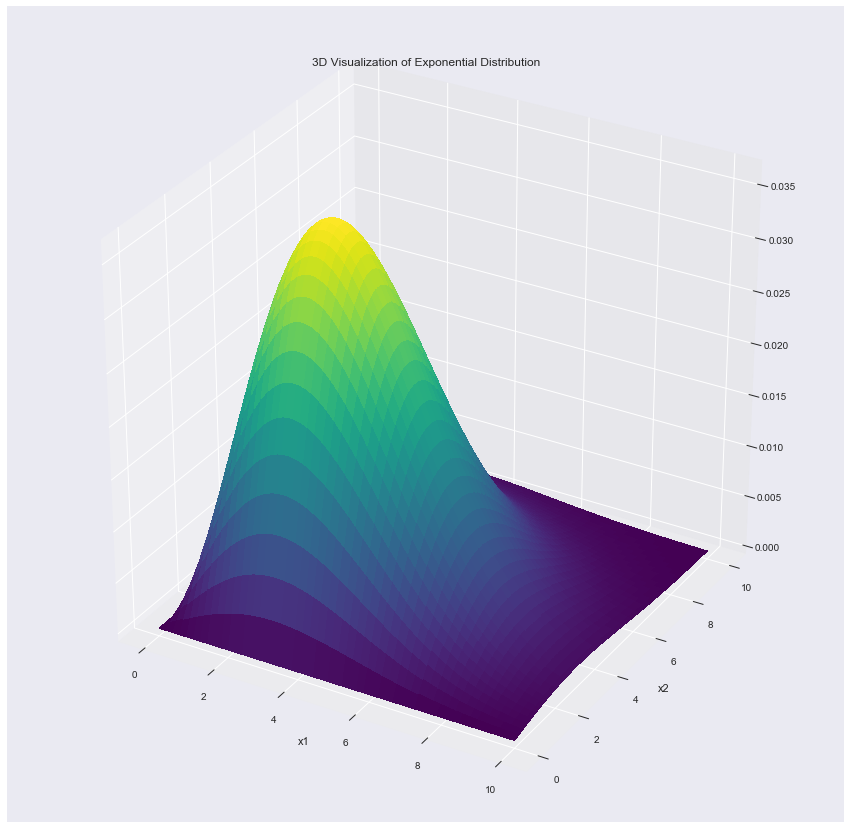

In [26]:
# code adapted from Christian @ https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
X = x1
Y = x2
X, Y = np.meshgrid(X, Y)

Z = f(X,Y)
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y, Z, antialiased=False,cmap=cm.viridis)

# h = -0.3
# cset = ax.contourf(X, Y, Z, zdir='z', offset=h, cmap=cm.viridis)
# ax.scatter(0.5,2.5,h,s=200,c='r',zdir='z')
# ax.scatter(3.2,1.3,h,s=200,c='r',zdir='z')
# ax.scatter(2.72,5.84,h,s=200,c='r',zdir='z')
# ax.scatter(10.047,0.354,h,s=200,c='r',zdir='z')


# # (0.5,2.5),(3.2,1.3),(2.72,5.84),(10.047,0.354
# # Adjust the limits, ticks and view angle
# ax.set_zlim(-0.3,0.2)
# ax.set_zticks(np.linspace(0,0.2,5))
# ax.view_init(27, -21)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.title('3D Visualization of Exponential Distribution')
plt.show()

#### 2-D Visualization

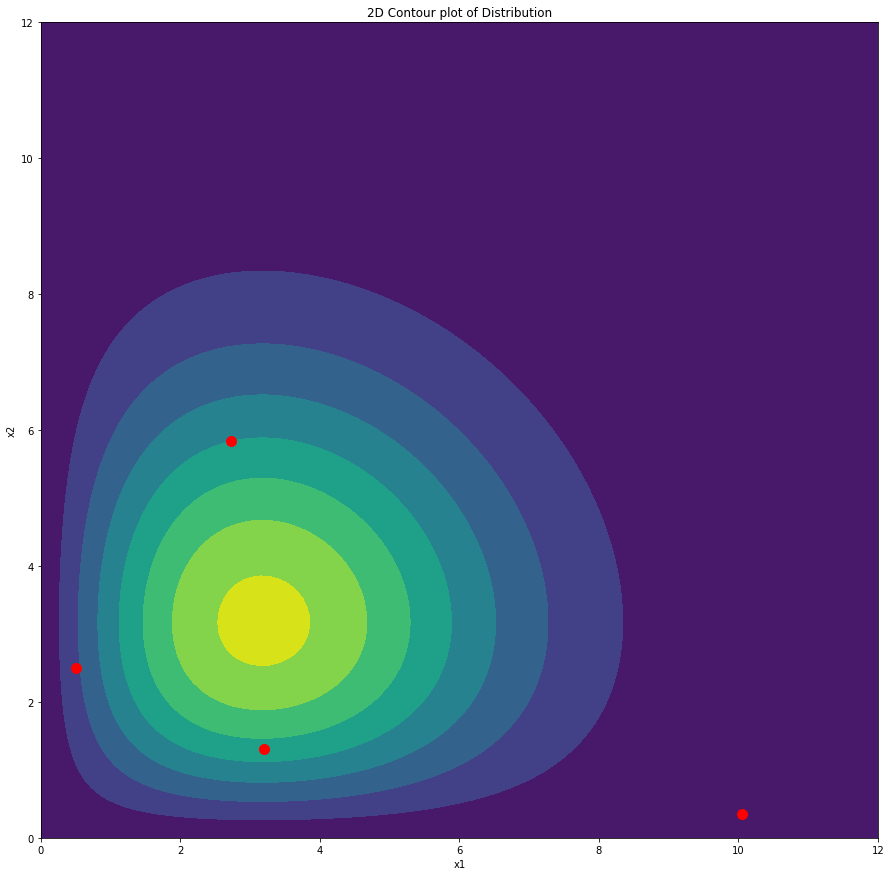

In [8]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
X = x1
Y = x2
X, Y = np.meshgrid(X, Y)

Z = f(X,Y)
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(15,15))
# ax = fig.gca(projection='3d')

plt.contourf(X, Y, Z, cmap=cm.viridis)
plt.scatter(0.5,2.5,s=100,c='r')
plt.scatter(3.2,1.3,s=100,c='r')
plt.scatter(2.72,5.84,s=100,c='r')
plt.scatter(10.047,0.354,s=100,c='r')

plt.title('2D Contour plot of Distribution')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Problem 3: Frequentist Stats

**Coding required**

Read the data set contained in [Homework_1_Data.txt](Homework_1_Data.txt). Each data point is a two-dimensional vector, $\mathbf{x} = (x_1, x_2)$.

### Part (A): Visualization and Interpretation

1. Make a 2-D visualization the distribution of the data. 

1. Visualize the the pdf, $f_X$, of the underlying distribution of the data.

1. Visualize the distribution defined by $f_{x_2 \mid x_1}$ for $x_1 \in [3.99, 4.01]$.

1. Visualize the distribution defined by $f_{x_1}$.





*****

In [9]:
# header has data!
df = pd.read_csv('Homework_1_Data.txt',header=None)

#### 1)

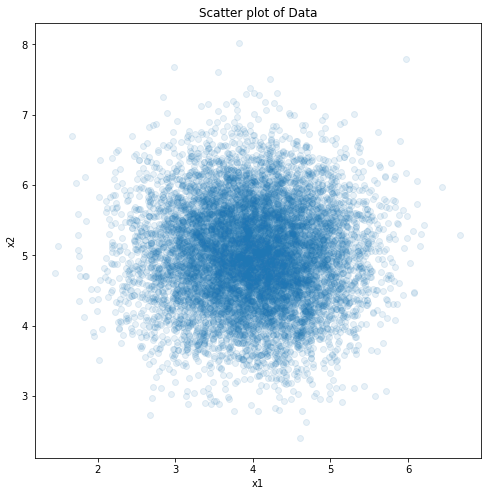

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(df[0],df[1],alpha=0.1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of Data')

#### 2)

C:\Users\Shaan Desai\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


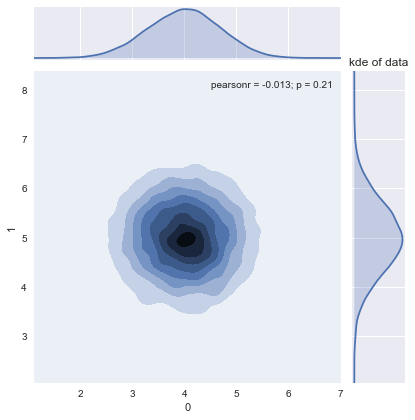

In [13]:
import seaborn as sns, numpy as np
sns.jointplot(x=0, y=1, data=df, kind="kde")
plt.title('kde of data')

#### 3)

Note, in the above figure we generated a kde function and plotted it. In this question we hope to use the same kde to determine the conditional distribution. I do this by using the gaussian kde from scipy on our data. I then determine the pdf values on a new grid of data points. I extract the points (x2 and pdf values) that are within the range of interest in x1. I then integrate and normalize this slice and plot it with the empirical histogram that arises simply without taking any kernel estimates e.g. sample distribution.

In [39]:
# A gaussian kde approach
from scipy.stats.kde import gaussian_kde

m1 = df[0].values # x1
m2 = df[1].values # x2
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()
# create a grid over which to evaluate the kde
X, Y = np.mgrid[xmin:xmax:300j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
# evaluate kde on our original data
kern = gaussian_kde(np.vstack([m1,m2]))
# evaluate kde on grid points
vals = kern(positions)

# now we want the condition x2|x1 3.99<x1<4.01
# indices where x1 is between the the two values
x1 = X.ravel()
x2 = Y.ravel()
idx = np.where(np.logical_and(x1>=3.99, x1<=4.01))
# extract pdf values in this slice and normalize
x2gx1 = vals[idx]/np.trapz(vals[idx],x=x2[idx])

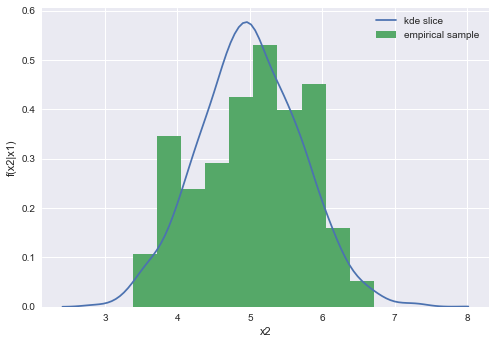

In [42]:
cond = df[(df[0]>=3.99) & (df[0]<= 4.01)]
plt.plot(x2[idx],x2gx1,label='kde slice')
plt.hist(cond[1],bins=10,normed=True,label = 'empirical sample')
plt.legend()
plt.xlabel('x2')
plt.ylabel('f(x2|x1)')

In [43]:
# test integral under curve
np.trapz(x2gx1,x = x2[idx])

0.99999999999999956

We can see that because the kde tries to smooth the pdf over the data points, the conditional distributions look slightly different but this is expected because of the smoothing.

#### 4)

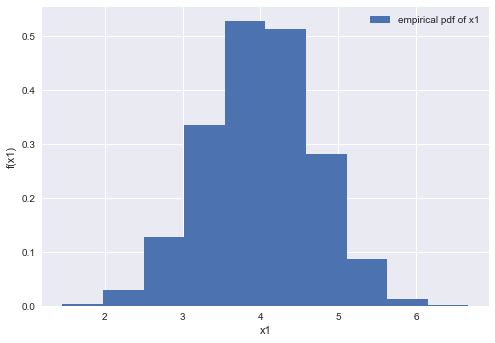

In [45]:
plt.hist(df[0],normed=True,label='empirical pdf of x1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('f(x1)')

Note that we could have taken the same approach as above in making this plot. We would have had to compute small integrals across x2 with x1 fixed. Then we would have had to sum those integrals as one does when finding the marginal. This approach would have been tedious and the above figure demonstrates what we are interested in.

In [79]:
# plt hist method of solving q3
# H, xbins, ybins = np.histogram2d(df[0], df[1], [300,10])
# H /= np.sum(H)
# idx = np.where(np.logical_and(xbins>=3.99, xbins<=4.01))
# x2gx1 = H[idx,:]
# x2gx1/=x2gx1.sum()
# ymid = [(ybins[i]+ybins[i+1])/2 for i in range(len(ybins)-1)]
# plt.plot(ymid, x2gx1.ravel(), drawstyle='steps')

### Part (B): Estimation using bootstrap

1. Empirically estimate the mean of the distribution $f_{x_1}$. Estimate, also the SE (standard error) of the estimate.

1. Empirically estimate the standard deviation of the distribution $f_{x_2 \mid x_1}$, for $x_1 \in [3.99, 4.01]$. Estimate, also the SE (standard error) of the estimate.

1. Given the SE, How many digits in your standard deviation estimate are significant? Explain why.

In obtaining estimates for this problem we want you to 

- define a function called *get_bootstrap_sample(dataset)* to generate each bootstrap sample
- and then another function *perform_bootstrap(dataset)* to generate all the samples. 

They should both take as parameters the dataset from which you'll be drawing samples. *perform_bootstrap* should call *get_bootstrap_sample* and return a sequence of bootstrap samples.  *get_bootstrap_sample* should return an individual bootstrap sample.

    

****

#### 1)

In [16]:
bootstraps = 1000
samplesize = 20

def get_bootstrap_sample(dataset):
# account for the possibility of having multiple column datasets
    if len(dataset.shape) != 1:
        sample = dataset.iloc[np.random.choice(dataset.shape[0], samplesize, replace=True),:]
    else:
        sample = dataset.iloc[np.random.choice(dataset.shape[0], samplesize, replace=True)]        
    return sample
def perform_bootstrap(dataset):
    if len(dataset.shape) != 1:
        samples = np.zeros((samplesize,dataset.shape[1],bootstraps))
        for i in range(bootstraps):
            samples[:,:,i] = get_bootstrap_sample(dataset)
    else:
        samples = np.zeros((samplesize,bootstraps))
        for i in range(bootstraps):
            samples[:,i] = get_bootstrap_sample(dataset)
    return samples

C:\Users\Shaan Desai\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


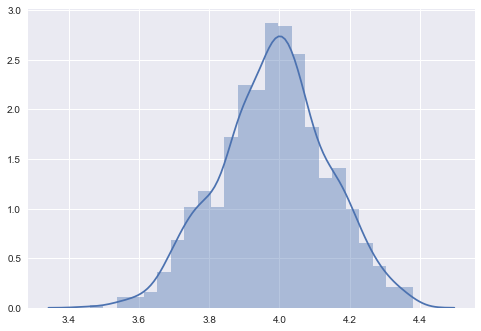

In [17]:
samples = perform_bootstrap(df[0])
means = np.mean(samples,axis=0)
sns.distplot(means)

In [18]:
print('mean = ' +str(np.mean(means)))
print('SE of mean = ' +str(np.std(means)))

mean = 3.98322557342
SE of mean = 0.154284467907


#### 2)

C:\Users\Shaan Desai\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


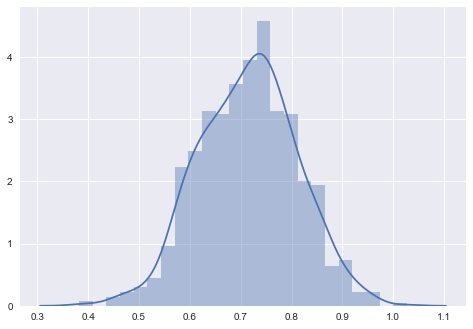

In [19]:
cond = df[(df[0]>=3.99) & (df[0]<= 4.01)]
samples = perform_bootstrap(cond[1])
stds = np.std(samples,axis=0)
sns.distplot(stds)

In [20]:
print('average std = ' +str(np.mean(stds,axis=0)))
print('deviation of std = ' +str(np.std(stds,axis=0)))

average std = 0.71479282967
deviation of std = 0.0961077400486


##### 3)

It seems to me that 2 significant figures makes the most sense in my case. Namely, the standard deviation suggests that the 100's number varies so any values beyond that are not as relevant. In essence, the measurement is $ 0.59 \pm 0.01$

## Problem 4: Missing Data

**Coding required**

Missing data is a very important topic in statistics and machine learning. Let us begin to explore how to handle missing data in our analysis.  We'll be working with a dataset from the UCI Machine Learning Repository that uses a variety of wine chemical predictors to classify wines grown in the same region in Italy.  Each line represents 13 (mostly chemical) predictors of the response variable wine class, including things like alcohol content, hue, and phenols.  Unfortunately some of the predictor values were lost in measurement. Please load [wine_quality_missing.csv](wine_quality_missing.csv).  (If pandas makes your life easier, feel free to use it).

1.  One way to handle missing data is to just totally ignore it by removing any rows that have any missing values.  This is called *drop imputation*.  Use drop imputation on our wine quality dataset.  How many rows does our imputed dataset have?

1. Another way to handle missing data is to replace any missing value with the mean of the non-missing values in that **column**.  This is called *mean imputation*.  How many rows does our mean imputed dataset have?

1.  Empirically estimate the pdf of the distribution of the sample mean of the ash predictor under drop imputation and mean imputation. Use the perform_bootstrap function from problem 3.

1. Compare the standard errors (SE) of the distributions under drop imputation and mean imputation in the previous question.  Can you suggest one or two reasons why they may be different?


In [112]:
wine_data = pd.read_csv('wine_quality_missing.csv')

In [113]:
wine_data.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
count,161.000000,161.000000,156.000000,158.000000,162.000000,158.000000,158.000000,159.000000,161.000000,163.000000,159.000000,164.000000,166.000000,178.000000
mean,13.015031,2.365963,2.366218,19.508861,99.870370,2.332722,2.042278,0.362704,1.596211,5.140123,0.953434,2.621707,748.644578,1.938202
std,0.804905,1.130562,0.283206,3.351345,14.683467,0.613105,0.999063,0.125611,0.579013,2.312528,0.226360,0.718192,314.766754,0.775035
min,11.410000,0.740000,1.360000,10.600000,70.000000,1.100000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.370000,1.610000,2.200000,17.200000,88.000000,1.800000,1.250000,0.270000,1.250000,3.325000,0.785000,1.952500,510.000000,1.000000
50%,13.050000,1.880000,2.365000,19.450000,98.000000,2.405000,2.135000,0.340000,1.550000,4.900000,0.970000,2.795000,675.000000,2.000000
75%,13.690000,3.100000,2.565000,21.500000,107.750000,2.822500,2.842500,0.445000,1.970000,6.340000,1.100000,3.192500,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


#### 1)

In [114]:
# drop imputation
print('The number of rows our imputed dataset has is '+ str( (wine_data.dropna(axis=0).shape[0])))

The number of rows our imputed dataset has is 43


#### 2)

In [115]:
print('The number of rows with mean imputation is '+ str(wine_data.fillna(wine_data.mean()).shape[0]))

The number of rows with mean imputation is 178


#### 3)

In [116]:
bootstraps = 1000
samplesize = 20
samples = perform_bootstrap(wine_data.dropna(axis=0)['Ash'])

C:\Users\Shaan Desai\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


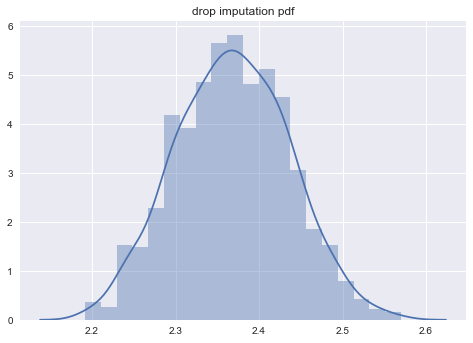

In [117]:
meandrop = np.mean(samples,axis=0)
plt.figure()
sns.distplot(meandrop)
plt.title('drop imputation pdf')

C:\Users\Shaan Desai\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


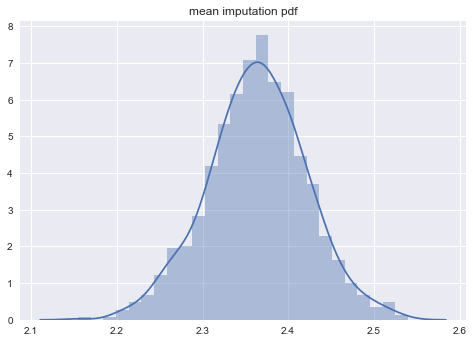

In [120]:
samples = perform_bootstrap(wine_data.fillna(wine_data.mean())['Ash'])
meanmean = np.mean(samples,axis=0)
plt.figure()
sns.distplot(meanmean)
plt.title('mean imputation pdf')

#### 4)

In [121]:
print('Standard Error of drop imputation = ' + str(np.std(meandrop)))
print('Standard Error of mean imputation = ' + str(np.std(meanmean)))

Standard Error of drop imputation = 0.0674211431952
Standard Error of mean imputation = 0.0579263702125


When we mean impute, we are essentially creating more datapoints at the mean so we reduce the standard deviation (in essence the numerator doesn't change but the number of datapoints does so we divide by more datapoints). 

Another thing is when we drop impute, we reduce our sample size and this might make our data more biased in the drop imputation case.